# Regression Assignment:


## Q1: Use the same dataset used in the source code (House_dataset.csv).

In [88]:
#importing libraries and dataset 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


train = pd.read_csv('./houses_dataset.csv')

In [89]:
#checking first rows from dataset
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
# remove missing values
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

### a. Delete all outlier data for the GarageArea field.

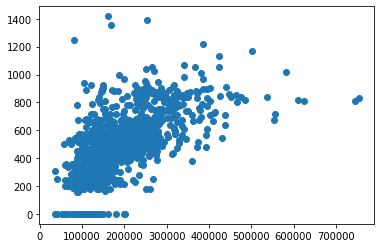

In [91]:
# plotting SalePrice and GarageArea
plt.scatter(data['SalePrice'], data['GarageArea'])

In [99]:
# observing on the scatter plot, SalePrice more than 600000 
# and GarageArea more than 1200 can be counted as outlier
index_names = data[ (data['GarageArea'] > 1200) | (data['SalePrice'] > 500000)].index
data.drop(index_names, inplace=True)
train.drop(index_names, inplace=True)


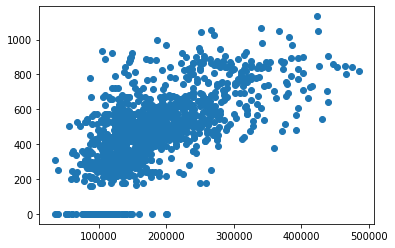

In [100]:
# plotting SalePrice and GarageArea
plt.scatter(data['SalePrice'], data['GarageArea'])

### b. Using simple regression select one feature that is positively correlated with ‘SalePrice’ create a regression model and plot the regression line between the two features.

In [101]:
#importing linear regression library
#building model for overall quality
target = np.log(data.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis = 1)
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=42, test_size=.20)
# getting linear model 
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
model.score(X_test, y_test)

0.8727049973221243

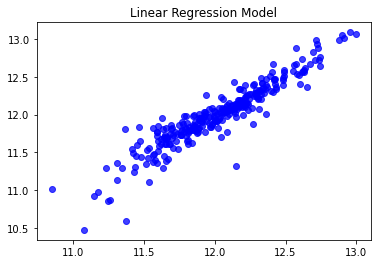

In [102]:
# getting prediction of overall quality
prediction = model.predict(X_test)
prediction
# visualizing model
#alpha helps to show overlapping data
plt.scatter(prediction, y_test, alpha=.75,
            color='b')
plt.title('Linear Regression Model')
plt.show()

In [96]:
# getting pivot table between salePrice
quality_pivot = data.pivot_table(index='OverallQual', values='SalePrice', 
                                  aggfunc=np.median)
print(quality_pivot)

             SalePrice
OverallQual           
1              50150.0
2              60000.0
3              87500.0
4             108000.0
5             133000.0
6             160000.0
7             200141.0
8             269750.0
9             335000.0
10            414430.5


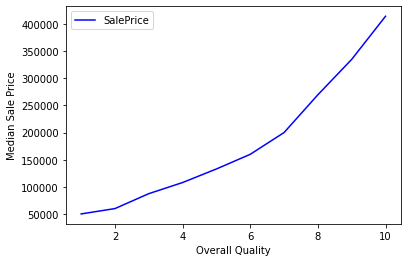

In [97]:
# plotting graph between salePrice and overall quality
quality_pivot.plot(kind='line', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

### c. Find top 5 most correlated features to the target label(SalePrice) and then build a model using those 5 features.

In [98]:
# selecting numeric features
numeric_features = data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
# printing positive correlation features with SalePrice
print("Positive Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[:], '\n')
# printing negative correlation features with SalePrice
print("\nNegative Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[-5:])
# OverallQual, GrLivArea, GarageCars, GarageArea, and TotalBsmtSF    
# are the top 5 most correlated features with sale price

Positive Correlation:
SalePrice        1.000000
OverallQual      0.804292
GrLivArea        0.704177
GarageCars       0.658366
GarageArea       0.649248
TotalBsmtSF      0.627884
1stFlrSF         0.607928
FullBath         0.552833
YearBuilt        0.542949
YearRemodAdd     0.530548
TotRmsAbvGrd     0.514320
GarageYrBlt      0.483700
Fireplaces       0.472295
MasVnrArea       0.436645
BsmtFinSF1       0.374622
OpenPorchSF      0.335477
WoodDeckSF       0.333257
LotFrontage      0.308192
2ndFlrSF         0.295642
HalfBath         0.285637
LotArea          0.257084
BsmtFullBath     0.236876
BsmtUnfSF        0.224570
BedroomAbvGr     0.168378
ScreenPorch      0.098071
MoSold           0.075051
3SsnPorch        0.054109
PoolArea         0.036826
BsmtFinSF2      -0.013651
MiscVal         -0.019148
LowQualFinSF    -0.023852
Id              -0.032259
BsmtHalfBath    -0.032814
YrSold          -0.037597
OverallCond     -0.072744
MSSubClass      -0.084543
EnclosedPorch   -0.129285
KitchenAbvGr    

In [103]:
#building model for garage living area
target = np.log(data.OverallQual)
X = data.drop(['OverallQual', 'Id'], axis = 1)
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=42, test_size=.20)
# getting linear model 
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
model.score(X_test, y_test)

0.6183804885384119

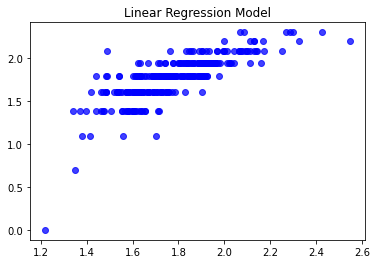

In [104]:
# getting prediction of garage living area
prediction = model.predict(X_test)
prediction
# visualizing model
#alpha helps to show overlapping data
plt.scatter(prediction, y_test, alpha=.75,
            color='b')
plt.title('Linear Regression Model')
plt.show()

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# MAE
print("MAE is:", mean_absolute_error(y_test, prediction))
# MSE
print("MSE is:", mean_squared_error(y_test, prediction))
# RMSE
print("RMSE is:", mean_squared_error(y_test, prediction, squared=False))
# R2
print("R^2 is:", r2_score(y_test, prediction))

MAE is: 0.11070252168438648
MSE is: 0.026226531693431275
RMSE is: 0.16194607649903495
R^2 is: 0.6183804885384119


In [121]:
#building model for garage living area
target = np.log(data.GrLivArea)
X = data.drop(['GrLivArea', 'Id'], axis = 1)
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=42, test_size=.20)
# getting linear model 
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
model.score(X_test, y_test)

0.9526846248044814

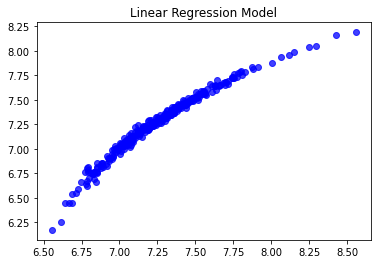

In [122]:
# getting prediction of garage living area
prediction = model.predict(X_test)
# visualizing model, alpha helps to show overlapping data
plt.scatter(prediction, y_test, alpha=.75,
            color='b')
plt.title('Linear Regression Model')
plt.show()

In [123]:
# MAE
print("MAE is:", mean_absolute_error(y_test, prediction))
# MSE
print("MSE is:", mean_squared_error(y_test, prediction))
# RMSE
print("RMSE is:", mean_squared_error(y_test, prediction, squared=False))
# R2
print("R^2 is:", r2_score(y_test, prediction))

MAE is: 0.04880120200488653
MSE is: 0.0052563028667807895
RMSE is: 0.07250036459757143
R^2 is: 0.9526846248044814


In [126]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:5])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

             Null Count
Feature                
PoolQC             1441
MiscFeature        1393
Alley              1355
Fence              1166
FireplaceQu         689


In [127]:
#building model for garage cars
target = np.log(data.GarageArea)
X = data.drop(['GarageArea', 'Id'], axis = 1)
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state=42, test_size=.20)
# getting linear model 
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- GrLivArea
Feature names seen at fit time, yet now missing:
- GarageArea

  warnings.warn(message, FutureWarning)


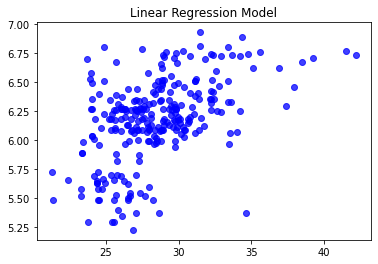

In [128]:
# getting prediction of garage cars
prediction = model.predict(X_test)
prediction
# visualizing model
#alpha helps to show overlapping data
plt.scatter(prediction, y_test, alpha=.75,
            color='b')
plt.title('Linear Regression Model')
plt.show()

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# MAE
print("MAE is:", mean_absolute_error(y_test, prediction))
# MSE
print("MSE is:", mean_squared_error(y_test, prediction))
# RMSE
print("RMSE is:", mean_squared_error(y_test, prediction, squared=False))
# R2
print("R^2 is:", r2_score(y_test, prediction))

ValueError: ignored